In [1]:
import matplotlib.pyplot as plt

import icepack as ice
import scipy
import numpy as np
from importlib import reload

In [2]:
mat = scipy.io.loadmat('./icepack2.mat')
prior_aicen = mat['prior_aicen']
prior_vicen = mat['prior_vicen']
a_array = prior_aicen[:,:,1].T
v_array = prior_vicen[:,:,1].T
h_bnd = ice.HeightBounds([0, 0.64450721681942580, 1.3914334975763036, 2.4701793819598885, 4.5672879188504911, 9.3338418158681744])
print(f'{"low":<10s}high')
print(*(f'{i[0]:<10f}{i[1]}' for i in h_bnd.intervals), sep='\n')

low       high
0.000000  0.6445072168194258
0.644507  1.3914334975763036
1.391433  2.4701793819598885
2.470179  4.567287918850491
4.567288  9.333841815868174


In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5, 1.0, 'Ice thickness distribution for $\\vec{a}=[0.3, 0.6, 0.1]$')

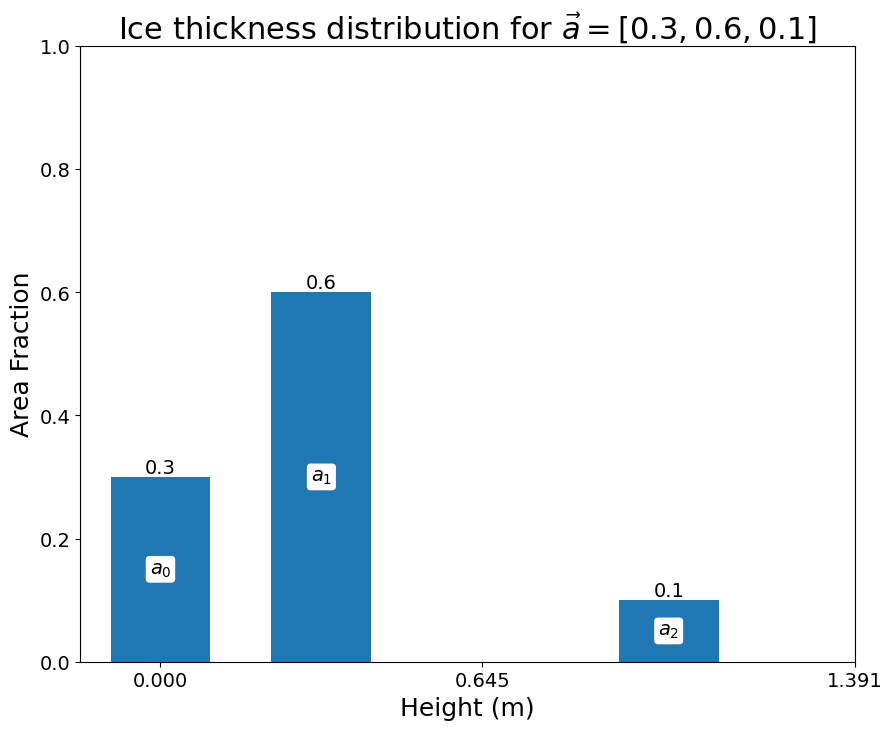

In [4]:
# visualize a raw sample
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
x = (h_bnd[:2] + h_bnd[1:3]) / 2
x = np.insert(x, 0, 0.)
bars = ax.bar(x=x, height=[0.3,0.6,0.1], width=0.2)

# add labels
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom')
    ax.text(bar.get_x() + bar.get_width()/2.0, yval/2.0, f'$a_{i}$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

ax.set_xticks(h_bnd[:-3])
ax.set_ylim(0., 1.)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Area Fraction')
ax.set_title('Ice thickness distribution for $\\vec{a}=[0.3, 0.6, 0.1]$')

[-4.44305134 -2.87528612 -7.14094917]


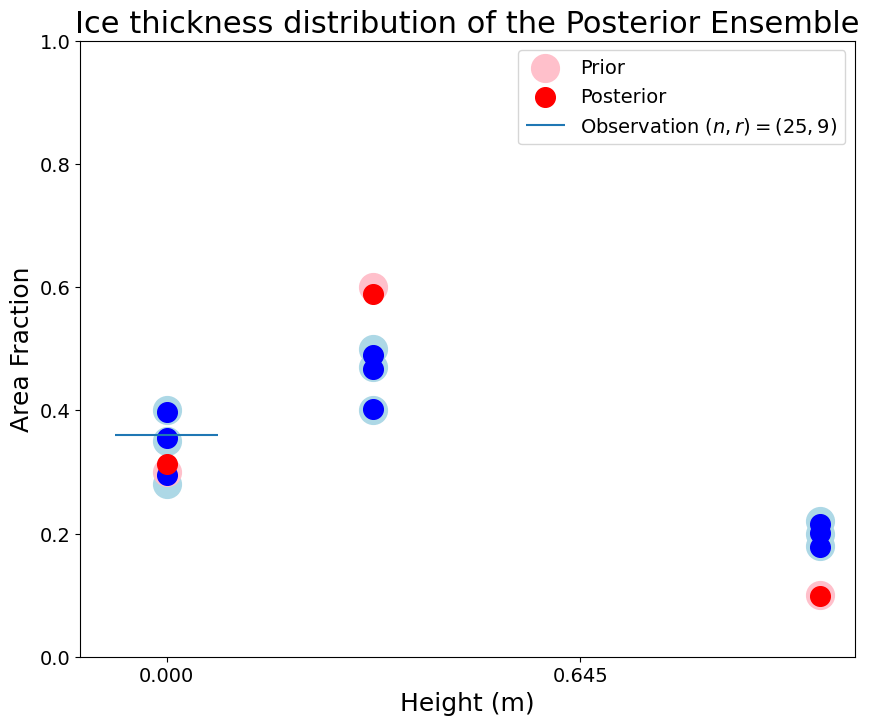

In [16]:
# visualize a raw sample
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
x = (h_bnd[:2] + h_bnd[1:3]) / 2
x = np.insert(x, 0, 0.)

data = np.array([[0.30,0.60,0.10],
                 [0.40,0.40,0.20],
                 [0.35,0.47,0.18],
                 [0.28,0.50,0.22]])

en = ice.Ensemble(samples = [ice.Sample(s) for s in data])
post = ice.transport_ensemble(en, observation=ice.Observation(n=25, r=9))

for i, sample in enumerate(data):
    ax.scatter(x, sample,s=(400 if i else 400), c=('lightblue' if i else 'pink'), zorder=(0 if i else 1), label=('Prior' if not i else ''))

for i, sample in enumerate(post.samples):
    ax.scatter(x, sample,s=(200 if i else 200), c=('b' if i else 'r'), zorder=(2 if i else 3), label=('Posterior' if not i else ''))

ax.set_xticks(h_bnd[:-3])
ax.set_ylim(0., 1.)
ax.set_xlabel('Height (m)')
ax.set_ylabel('Area Fraction')
ax.set_title('Ice thickness distribution of the Posterior Ensemble')

ax.hlines(y=9/25, xmin=-0.08, xmax=0.08, label='Observation $(n, r) = (25, 9)$')
ax.legend()

## Samples lie on the Simplex

- $a_i > 0$
- $\sum{a_i} = 1$

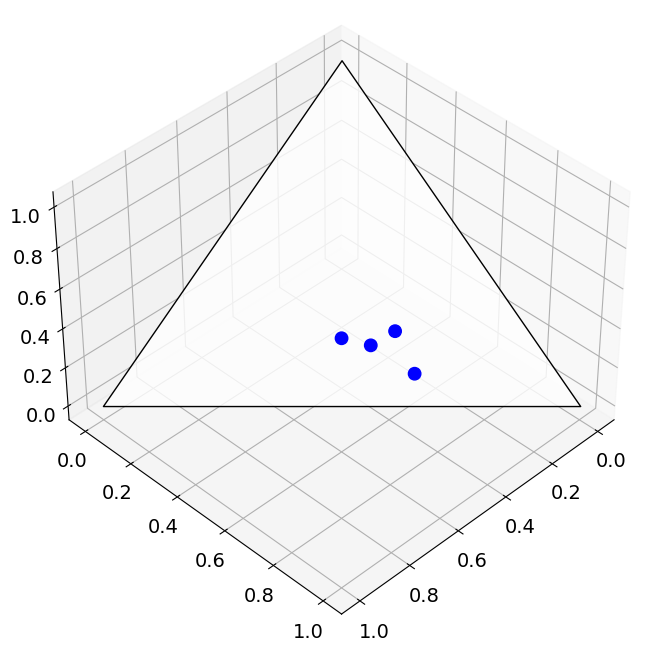

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Initialize the figure and 3D projection
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Define vertices
vertices = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])


# Create surface
ax.add_collection3d(Poly3DCollection([vertices], facecolors='white', linewidths=1, edgecolors='black', alpha=0.8))

# Remove gray gridlines
# ax.grid(False)
data_out = data * 1.02
ax.scatter(data_out[:,0], data_out[:,1], data_out[:,2], c='b', s=80, zorder=10, alpha=1)

ax.view_init(elev=40, azim=45)



In [93]:
data_out

array([[0.315 , 0.63  , 0.105 ],
       [0.42  , 0.42  , 0.21  ],
       [0.3675, 0.4935, 0.189 ],
       [0.294 , 0.525 , 0.231 ]])

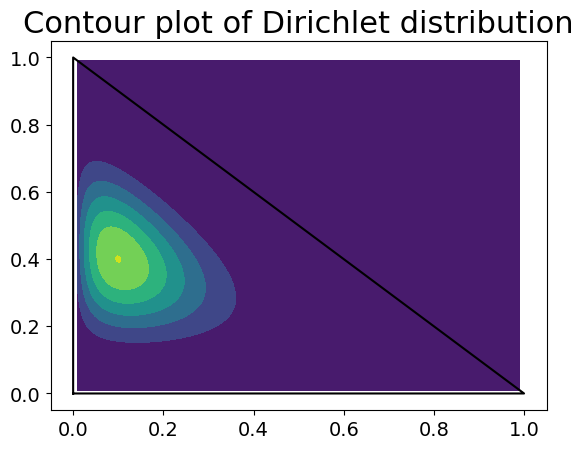

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy.special import gamma
from functools import reduce

# Function to calculate Dirichlet PDF
def dirichlet_pdf(x, alphas):
    numerator = reduce(lambda x, y: x*y, [x_i**(alpha_i-1) for x_i, alpha_i in zip(x, alphas)])
    denominator = gamma(np.sum(alphas)) / reduce(lambda x, y: x*y, [gamma(alpha_i) for alpha_i in alphas])
    return numerator / denominator

# Parameters of the Dirichlet distribution
alphas = [2, 5, 6]

# Create a grid of points in the triangle
resolution = 200
x = np.linspace(0.01, 0.99, resolution)
y = np.linspace(0.01, 0.99, resolution)
X, Y = np.meshgrid(x, y)
Z = 1 - X - Y

# Compute PDF at each grid point
pdf = np.zeros((resolution, resolution))
for i in range(resolution):
    for j in range(resolution):
        if X[i,j] + Y[i,j] < 1:
            pdf[i,j] = dirichlet_pdf([X[i,j], Y[i,j], Z[i,j]], alphas)

# Create triangulation and plot
triang = tri.Triangulation(X.flatten(), Y.flatten())
plt.tricontourf(triang, pdf.flatten())
plt.plot([0, 1, 0, 0], [0, 0, 1, 0], 'k-')
plt.title('Contour plot of Dirichlet distribution')
plt.show()


[]

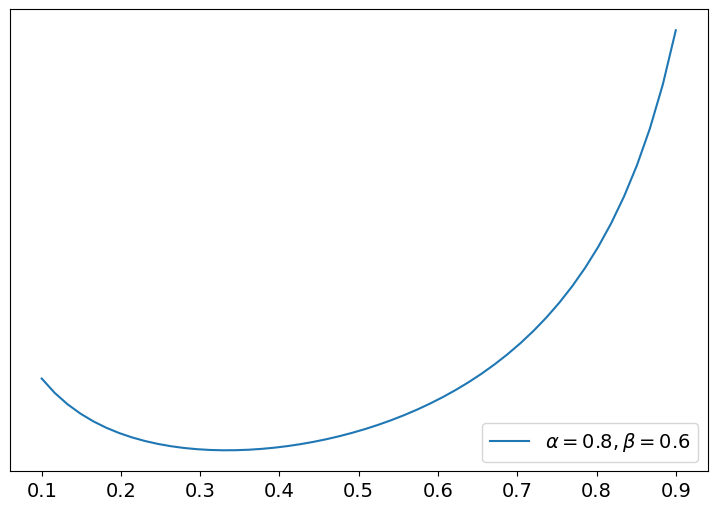

In [19]:
betapdf = scipy.stats.beta(0.8, 0.6).pdf
x = np.linspace(0.1, 0.9)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, betapdf(x), label='$\\alpha=0.8, \\beta=0.6$')
ax.legend(loc='lower right')
ax.set_yticks([])

In [20]:
data

array([[0.3 , 0.6 , 0.1 ],
       [0.4 , 0.4 , 0.2 ],
       [0.35, 0.47, 0.18],
       [0.28, 0.5 , 0.22]])

In [21]:
ice.Sample(data[0])

Sample([0.3, 0.6, 0.1])

In [22]:
ce = ice.ClassEnsemble([ice.Sample(s) for s in data])
ce

ClassEnsemble(samples=[Sample([0.3, 0.6, 0.1]), Sample([0.4, 0.4, 0.2]), Sample([0.35, 0.47, 0.18]), Sample([0.28, 0.5 , 0.22])])

In [23]:
reload(ice)
diri=ice.fit_dirichlet(ce)
diri

[-4.44305134 -2.87528612 -7.14094917]


ClassDirichlet(alpha=Sample([21.45676248, 31.51448071, 11.17299314]), sample_class=SampleClass([ True,  True,  True]))

In [24]:
11 / (31+21+11)

0.1746031746031746

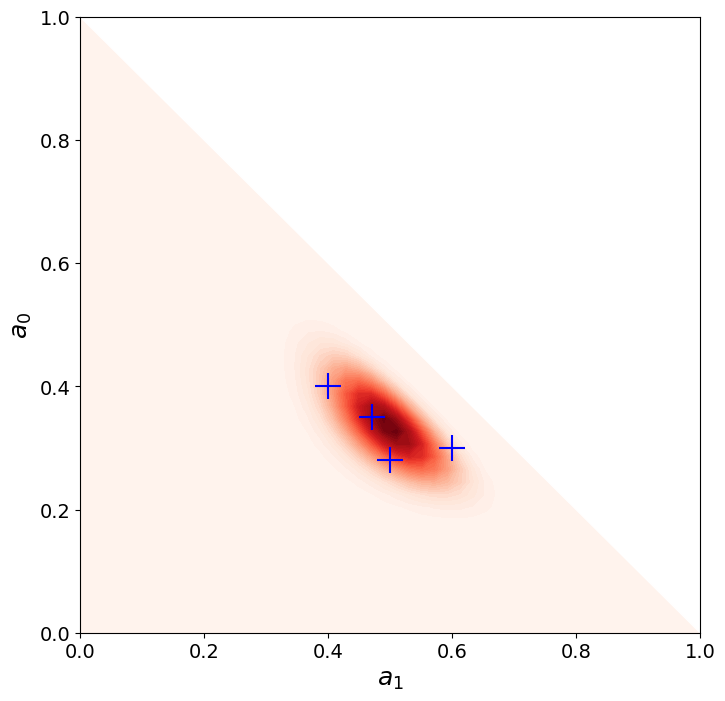

In [25]:
res = 50
x1 = np.linspace(0, 1)
x2 = np.linspace(0, 1)
GRID = np.meshgrid(x1, x2)
X1, X2 = GRID
pdf = scipy.stats.dirichlet(diri.alpha).pdf
# pdf = np.vectorize(pdf)
z = np.zeros_like(X1)
for i in range(res):
    a = x1[i]
    for j in range(res):
        b = x2[j]
        if a+b>=1:
            continue
        z[i,j] = pdf([a, b])

plt.figure(figsize=(8, 8))
plt.contourf(X1, X2, z, levels=40, cmap='Reds')
plt.xlabel('$a_1$')
plt.ylabel('$a_0$')
# plt.colorbar()

plt.gca().add_patch(plt.Polygon([[0, 1], [1, 0], [1, 1]], closed=True, fill=True, color='white'))
plt.scatter(data[:,1], data[:,0], c='blue', marker='+', s=350)


[]

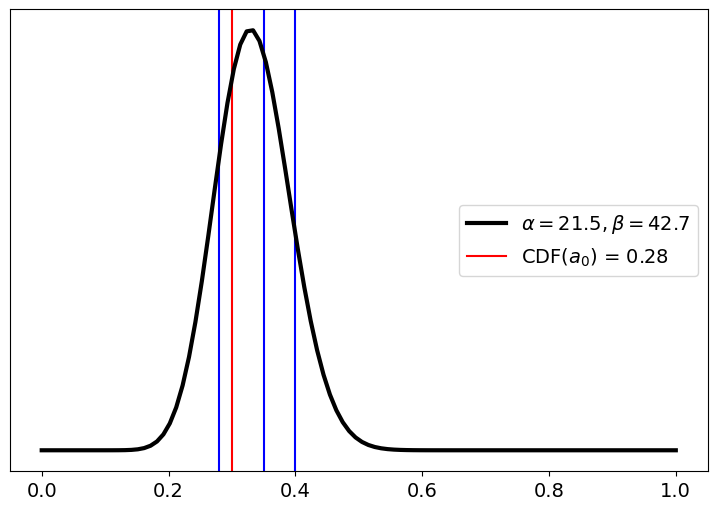

In [26]:
alpha = diri.alpha
a, b = alpha[0], alpha[1:].sum()
beta = scipy.stats.beta(a, b)
delta = 0.
x = np.linspace(0 + delta, 1 - delta, 100)
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x, beta.pdf(x), label=f'$\\alpha={a:.1f}, \\beta={b:.1f}$', color='black', zorder=10, lw=3)
for i, a0 in enumerate(data[:,0]):
    if not i:
        ax.axvline(a0, color='r', label='CDF($a_0$) = 0.28')
        continue
    ax.axvline(a0, color='b')
ax.legend(loc='center right')
ax.set_yticks([])


[]

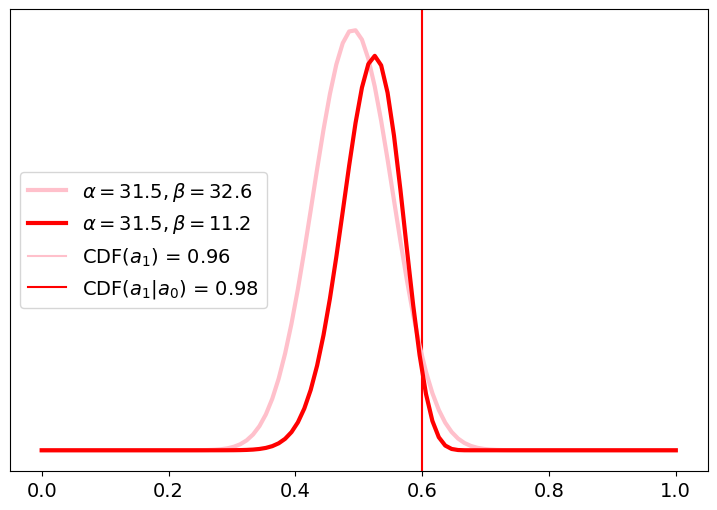

In [27]:
delta = 0.
x = np.linspace(0 + delta, 1 - delta, 100)
fig, ax = plt.subplots(figsize=(9, 6))

a, b = alpha[1], alpha[[0,2]].sum()
beta = scipy.stats.beta(a, b)
ax.plot(x, beta.pdf(x), label=f'$\\alpha={a:.1f}, \\beta={b:.1f}$', color='pink', zorder=10, lw=3)
cdf1 = beta.cdf(data[0,1])

a, b = alpha[1], alpha[2]
beta = scipy.stats.beta(a, b)
ax.plot(x, beta.pdf(x / (1-data[0,0])), label=f'$\\alpha={a:.1f}, \\beta={b:.1f}$', color='red', zorder=10, lw=3)
cdf2 = beta.cdf(data[0,1] / (1-data[0,0]))

ax.axvline(data[0,1], color='pink', label=f'CDF($a_1$) = {cdf1:.2f}')
ax.axvline(data[0,1], color='r', label=f'CDF($a_1|a_0$) = {cdf2:.2f}')

ax.legend(loc='center left')
ax.set_yticks([])


[]

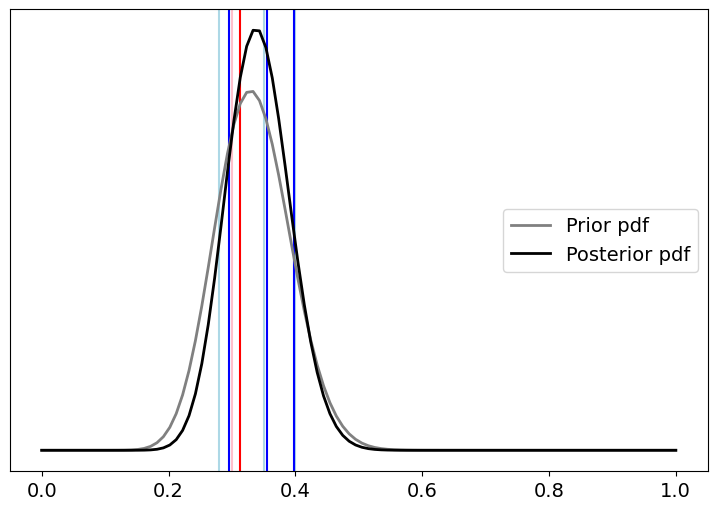

In [28]:
alpha = diri.alpha

delta = 0.
x = np.linspace(0 + delta, 1 - delta, 100)
fig, ax = plt.subplots(figsize=(9, 6))

a, b = alpha[0], alpha[1:].sum()
beta1 = scipy.stats.beta(a, b)
ax.plot(x, beta1.pdf(x), label=f'Prior pdf', color='gray', zorder=10, lw=2)
for i, a0 in enumerate(data[:,0]):
    ax.axvline(a0, color=('lightblue' if i else 'pink'))

n, k = 9, 16
a, b = alpha[0] + n, alpha[1:].sum() + k
beta2 = scipy.stats.beta(a, b)
ax.plot(x, beta2.pdf(x), label=f'Posterior pdf', color='black', zorder=10, lw=2)
for i, a0 in enumerate(data[:,0]):
    ax.axvline(beta2.isf(1 - beta1.cdf(a0)), color=('b' if i else 'r'))



ax.legend(loc='center right')
ax.set_yticks([])


In [29]:
a0post = beta2.isf(1 - beta1.cdf(data[0,0]))
a0post

0.3124318313296207

[]

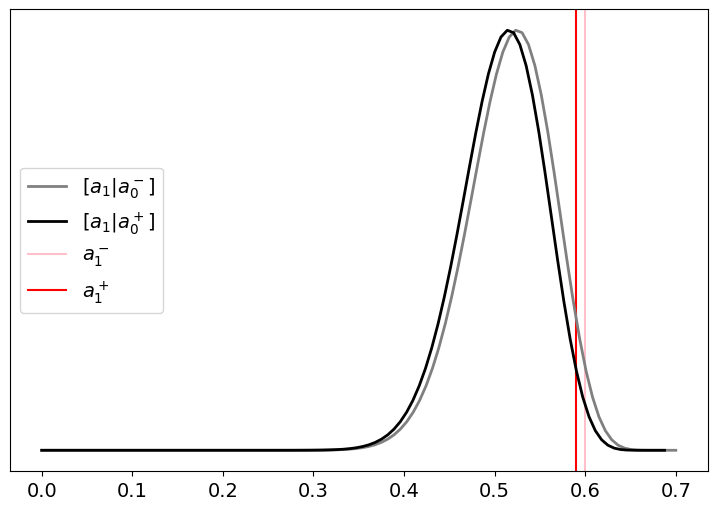

In [31]:
delta = 0.
x = np.linspace(0 + delta, 1 - delta, 100)
fig, ax = plt.subplots(figsize=(9, 6))

a, b = alpha[1], alpha[2]
beta1 = scipy.stats.beta(a, b)
ax.plot(x * (1-data[0,0]), beta1.pdf(x), label=f'$[a_1 | a_0^-]$', color='gray', zorder=10, lw=2)
cdf2 = beta1.cdf(data[0,1] / (1-data[0,0]))

a, b = alpha[1], alpha[2]
beta2 = scipy.stats.beta(a, b)
ax.plot(x * (1-a0post), beta2.pdf(x), label=f'$[a_1 | a_0^+]$', color='black', zorder=10, lw=2)
cdf2 = beta2.cdf(data[0,1] / (1-data[0,0]))

a1post = beta2.isf(1 - beta1.cdf(data[0,1] / (1-data[0,0]))) * (1 - a0post)

ax.axvline(data[0,1], color='pink', label=f'$a_1^-$')
ax.axvline(a1post, color='red', label=f'$a_1^+$')

ax.legend(loc='center left')
ax.set_yticks([])
